In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  #to ignore warnings

In [173]:
plt.close('all')     #to close all running pyplot windows

# **Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.**

In [174]:
#import dataset

df = pd.read_csv("/content/drive/MyDrive/walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [175]:
#shape of data

df.shape

(550068, 10)

In [176]:
df.info()   #to check data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# **Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)**

In [177]:
#check null values

df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


there is no null value in data

In [178]:
df.duplicated().sum()   # check duplicate values in data

np.int64(0)

In [179]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [180]:
df.nunique().sort_values(ascending=False)  #check unique values of every column

,0
Purchase,18105
User_ID,5891
Product_ID,3631
Occupation,21
Product_Category,20
Age,7
Stay_In_Current_City_Years,5
City_Category,3
Gender,2
Marital_Status,2


In [181]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,object
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,object
Product_Category,object
Purchase,int64


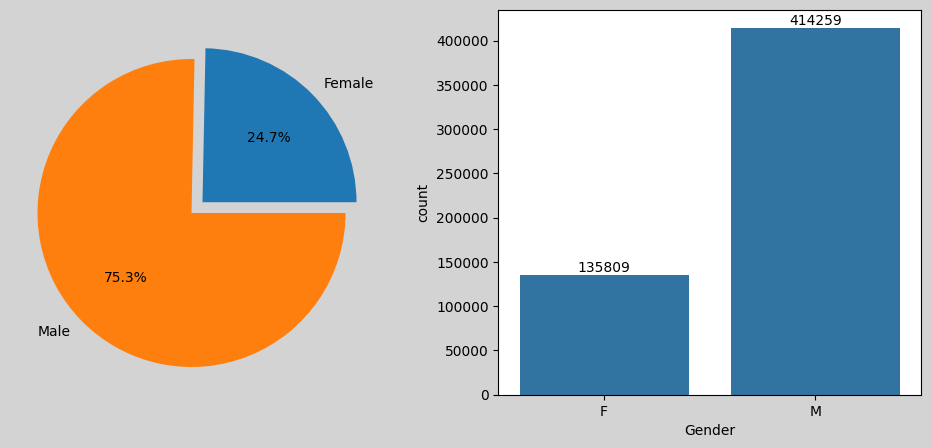

In [182]:
plt.figure(figsize=(12,5)).set_facecolor('lightgrey')
plt.subplot(1,2,1)
plt.pie(df.groupby('Gender')['Gender'].count(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%')

plt.subplot(1,2,2)
ax=sns.countplot(x='Gender',data=df)
for i in ax.containers:
  ax.bar_label(i)
plt.show()

As per above data 75% of male purchase and approx 25% of female purchase

In [183]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

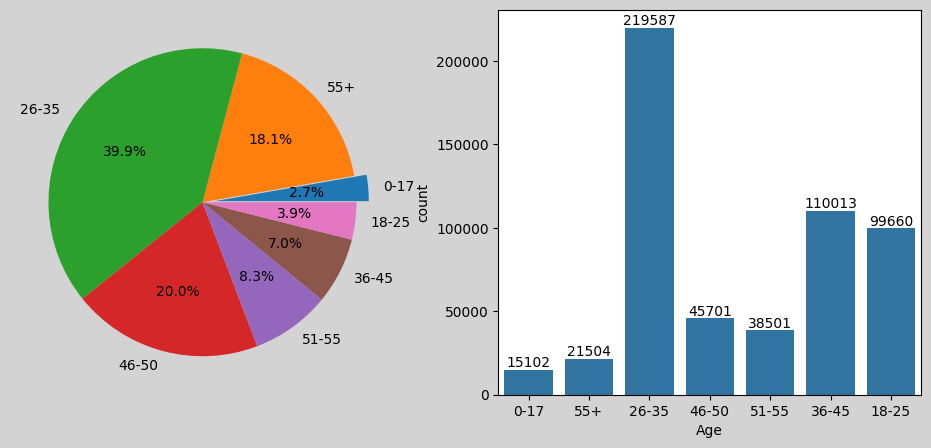

In [184]:
plt.figure(figsize=(12,5)).set_facecolor('lightgrey')
plt.subplot(1,2,1)
plt.pie(df.groupby('Age')['Age'].count(),labels=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],explode=(0.08,0,0,0,0,0,0),autopct='%1.1f%%')

plt.subplot(1,2,2)
ax=sns.countplot(x='Age',data=df)
for i in ax.containers:
  ax.bar_label(i)
plt.show()

26-35 Age category people purchase most(40%) and 0-17 age category people purchase least(2.7%)

In [185]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

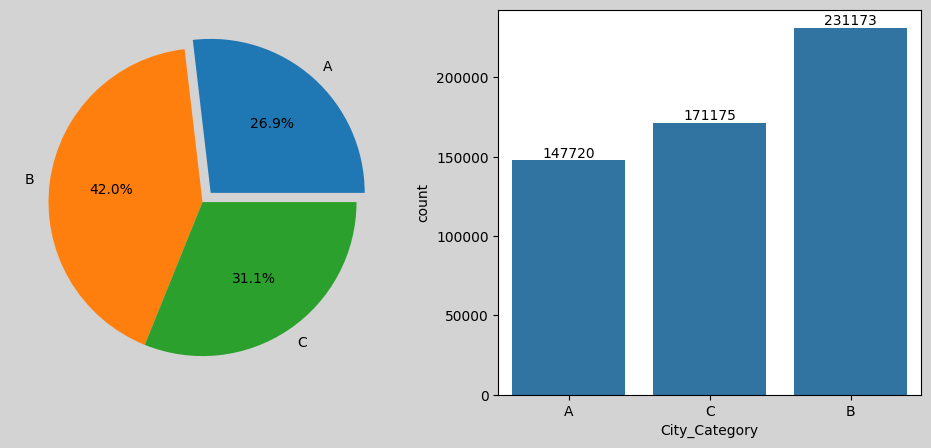

In [186]:
plt.figure(figsize=(12,5)).set_facecolor('lightgrey')
plt.subplot(1,2,1)
plt.pie(df.groupby('City_Category')['City_Category'].count(),labels=['A', 'B', 'C'],explode=(0.08,0,0),autopct='%1.1f%%')

plt.subplot(1,2,2)
ax=sns.countplot(x='City_Category',data=df)
for i in ax.containers:
  ax.bar_label(i)
plt.show()

Most customers come from City_Category B and least customers come from City_Category A

In [187]:
df['Marital_Status'].unique()

array([0, 1], dtype=object)

In [188]:
df['Marital_Status'].replace({0:'Unmarried',1:'Married'},inplace=True)

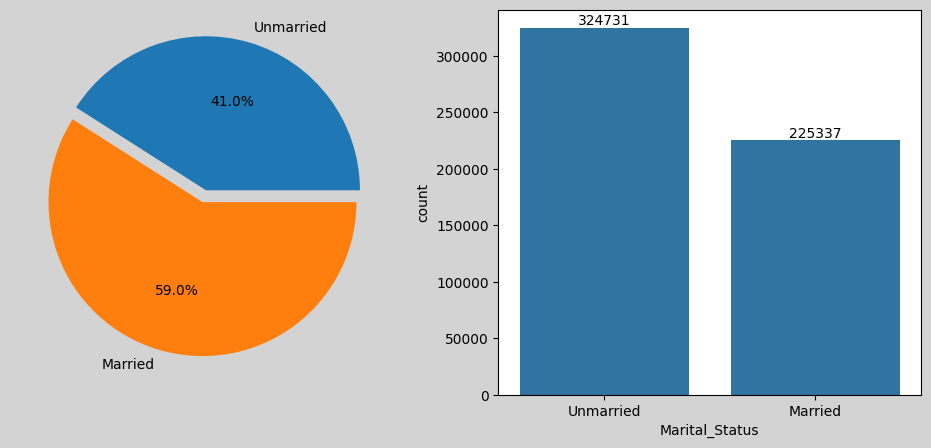

In [189]:
plt.figure(figsize=(12,5)).set_facecolor('lightgrey')
plt.subplot(1,2,1)
plt.pie(df.groupby('Marital_Status')['Marital_Status'].count(),labels=['Unmarried', 'Married'],explode=(0.08,0),autopct='%1.1f%%')

plt.subplot(1,2,2)
ax=sns.countplot(x='Marital_Status',data=df)
for i in ax.containers:
  ax.bar_label(i)
plt.show()

Most customers are Married

In [190]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

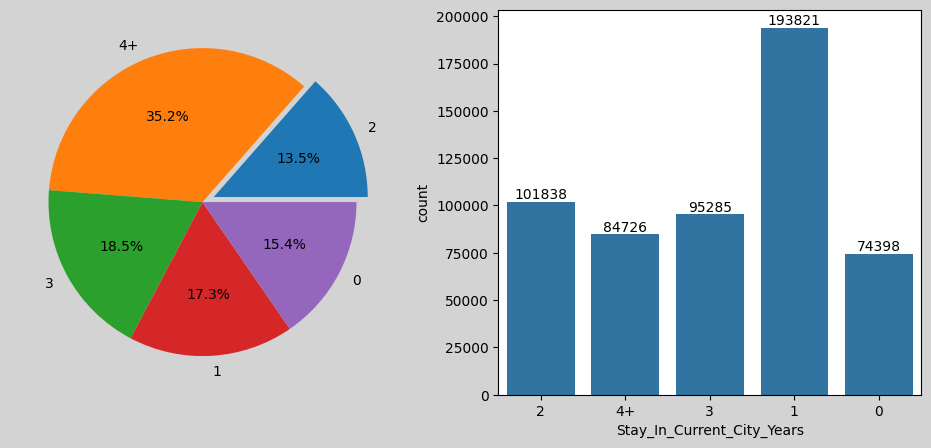

In [191]:
plt.figure(figsize=(12,5)).set_facecolor('lightgrey')
plt.subplot(1,2,1)
plt.pie(df.groupby('Stay_In_Current_City_Years')['Stay_In_Current_City_Years'].count(),labels=['2', '4+', '3', '1', '0'],explode=(0.08,0,0,0,0),autopct='%1.1f%%')

plt.subplot(1,2,2)
ax=sns.countplot(x='Stay_In_Current_City_Years',data=df)
for i in ax.containers:
  ax.bar_label(i)
plt.show()

Most Customers who are living from more than 4+ years and least customers who are living 2 years

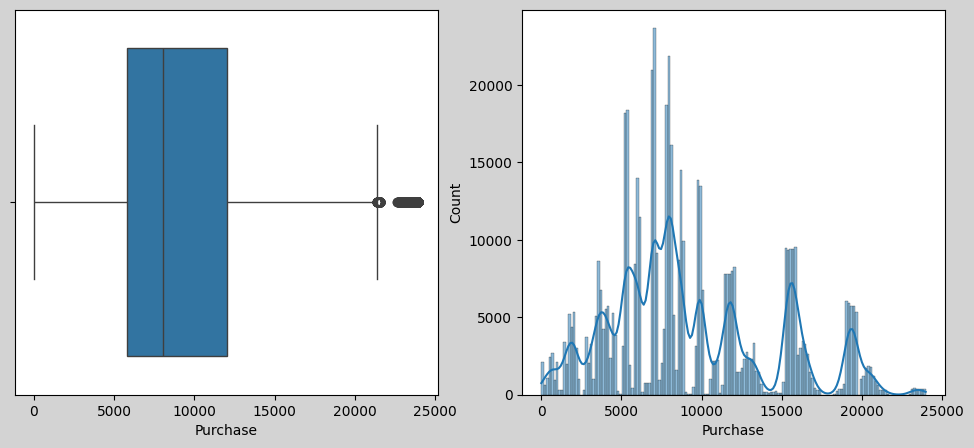

In [192]:
plt.figure(figsize=(12,5)).set_facecolor('lightgrey')
plt.subplot(1,2,1)
sns.boxplot(df['Purchase'], orient='h')

plt.subplot(1,2,2)
sns.histplot(df['Purchase'],kde=True)
plt.show()

It shows there are some outliers in Purchase

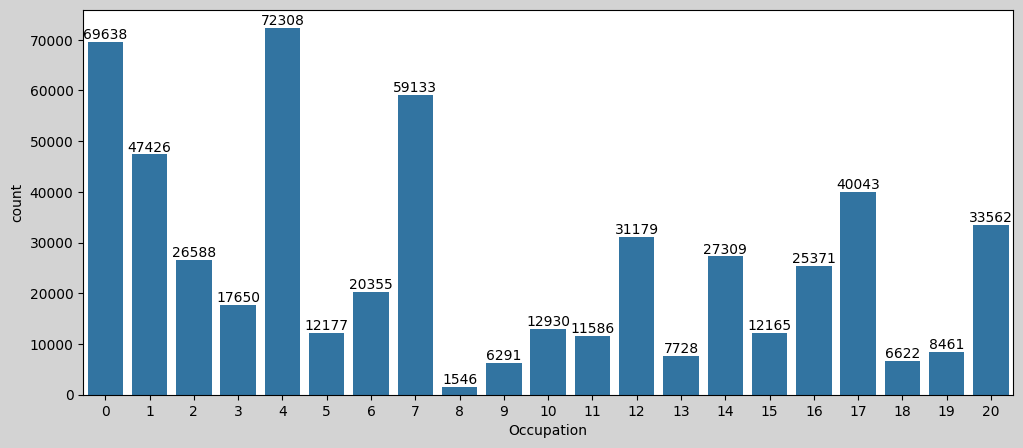

In [193]:
plt.figure(figsize=(12,5)).set_facecolor('lightgrey')

ax=sns.countplot(x='Occupation',data=df)
for i in ax.containers:
  ax.bar_label(i)
plt.show()

Customers form Occupation 4 are most followed by Occupation 0 and Occupation 1

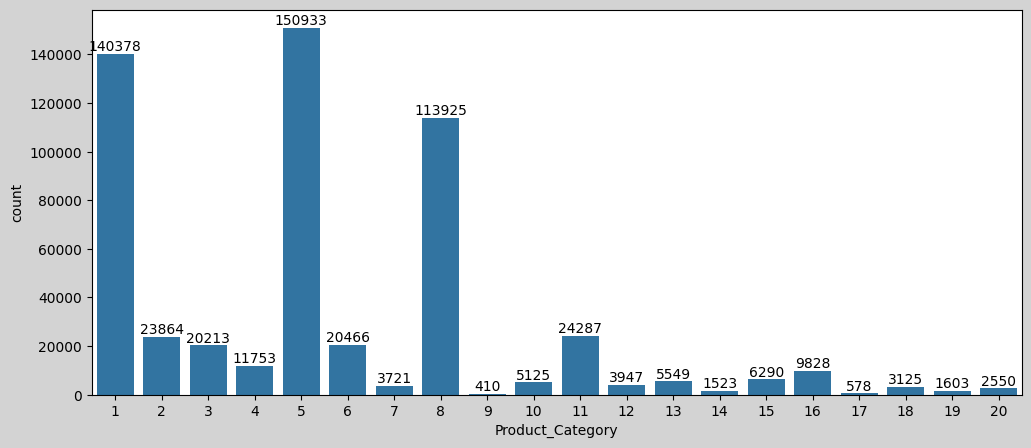

In [194]:
plt.figure(figsize=(12,5)).set_facecolor('lightgrey')

ax=sns.countplot(x='Product_Category',data=df)
for i in ax.containers:
  ax.bar_label(i)
plt.show()

Customers purchase most Product category 5 followed by Product Category 1

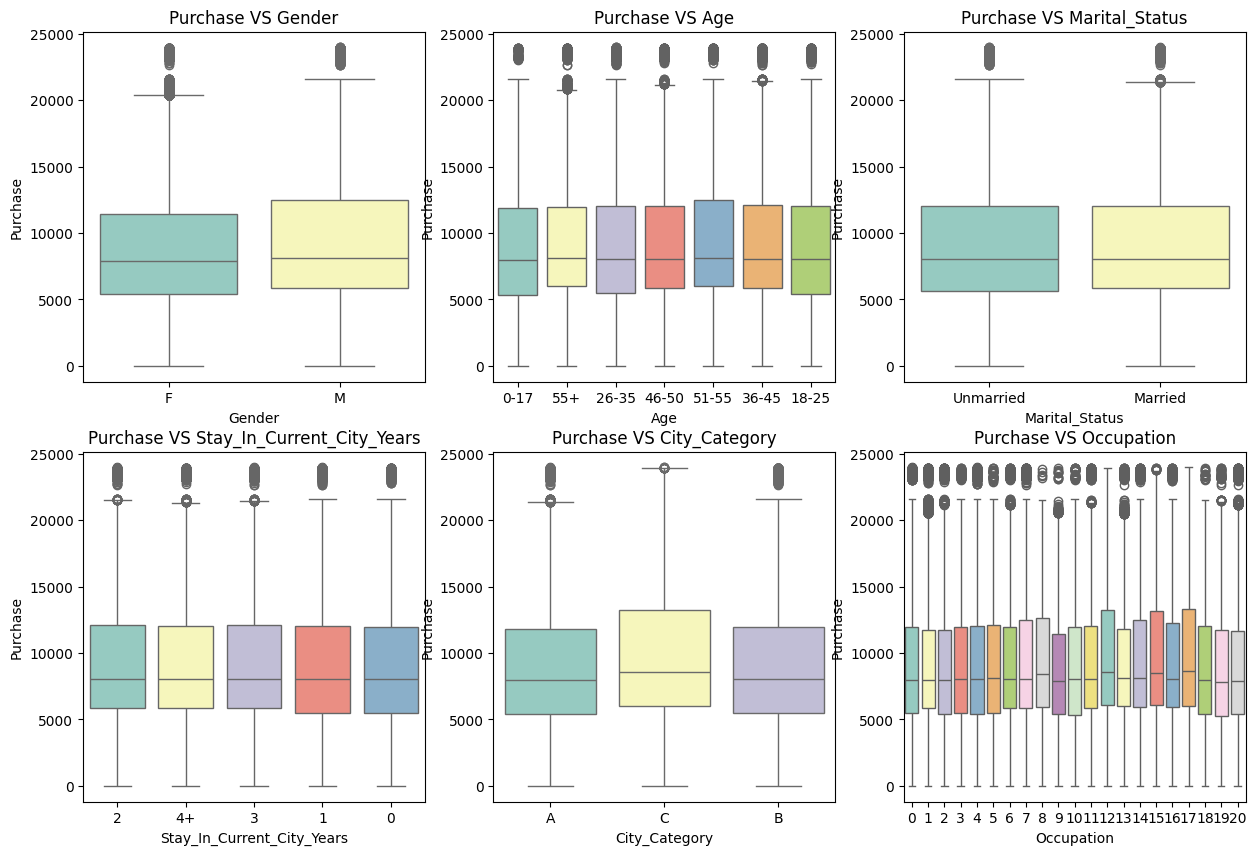

In [195]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(y='Purchase',x='Gender',data=df,palette='Set3')
plt.title("Purchase VS Gender")

plt.subplot(2,3,2)
sns.boxplot(y='Purchase',x='Age',data=df,palette='Set3')
plt.title("Purchase VS Age")

plt.subplot(2,3,3)
sns.boxplot(y='Purchase',x='Marital_Status',data=df,palette='Set3')
plt.title("Purchase VS Marital_Status")

plt.subplot(2,3,4)
sns.boxplot(y='Purchase',x='Stay_In_Current_City_Years',data=df,palette='Set3')
plt.title("Purchase VS Stay_In_Current_City_Years")

plt.subplot(2,3,5)
sns.boxplot(y='Purchase',x='City_Category',data=df,palette='Set3')
plt.title("Purchase VS City_Category")

plt.subplot(2,3,6)
sns.boxplot(y='Purchase',x='Occupation',data=df,palette='Set3')
plt.title("Purchase VS Occupation")

plt.show()

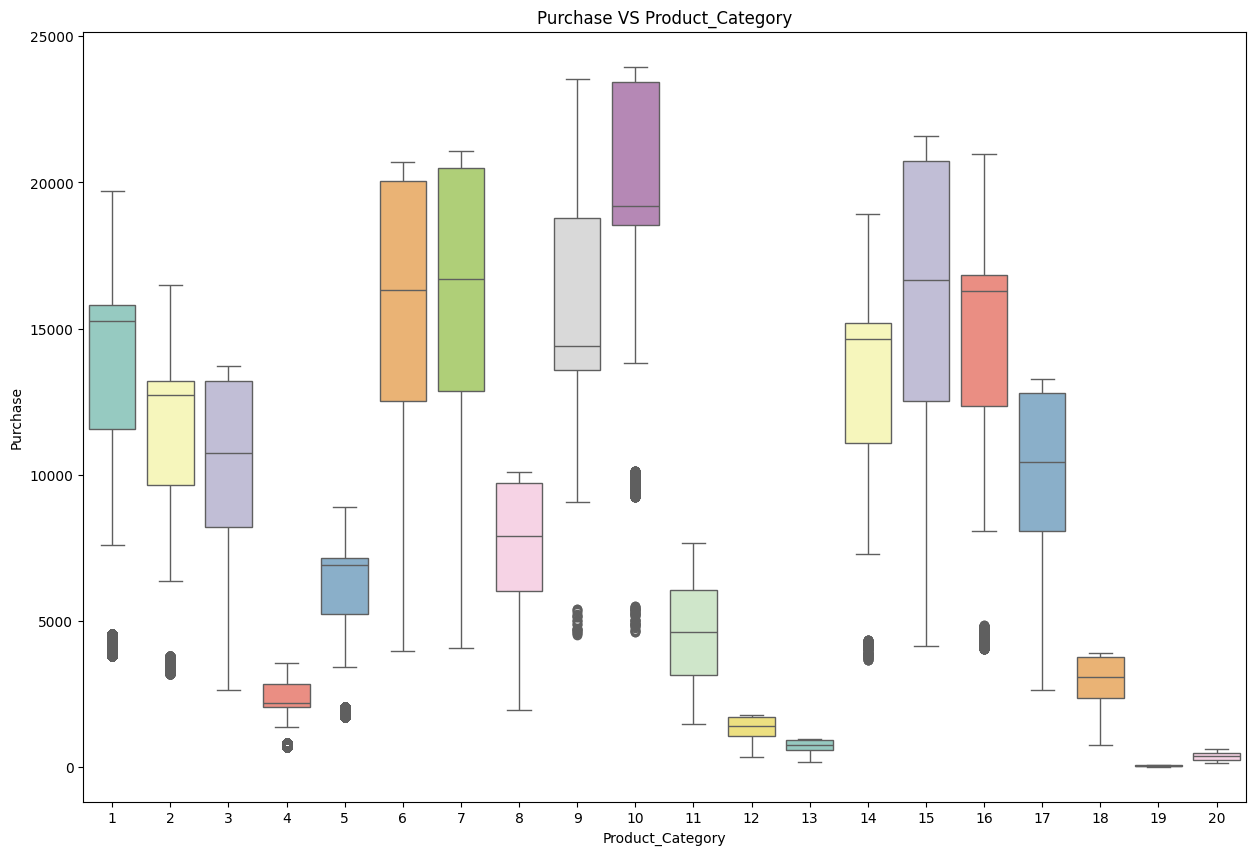

In [196]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Product_Category',y='Purchase',data=df,palette='Set3')
plt.title("Purchase VS Product_Category")

plt.show()

From above graph it clearly shows there is large differences in median values for all product categories

In [197]:
df.groupby('Product_Category')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


Median value of product category 10 is highest i.e. 19197
Median value of product category 19is lowest i.e. 37
Mean value of product category 19 is highest i.e. 19675
Mean value of product category 19 is lowest i.e 37.04
It clearly show product category 19 is least preferred or bought

**Handling Outliers**

In [198]:
q1 = df["Purchase"].quantile(0.25)
q3 = df["Purchase"].quantile(0.75)
IQR = q3-q1
outliers = df["Purchase"][((df["Purchase"]<(q1-1.5*IQR)) | (df["Purchase"]>(q3+1.5*IQR)))]
print("number of outliers: "+ str(len(outliers)))
print("max outlier value:"+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers.head()

number of outliers: 2677
max outlier value:23961
min outlier value: 21401


,Purchase
343,23603
375,23792
652,23233
736,23595
1041,23341


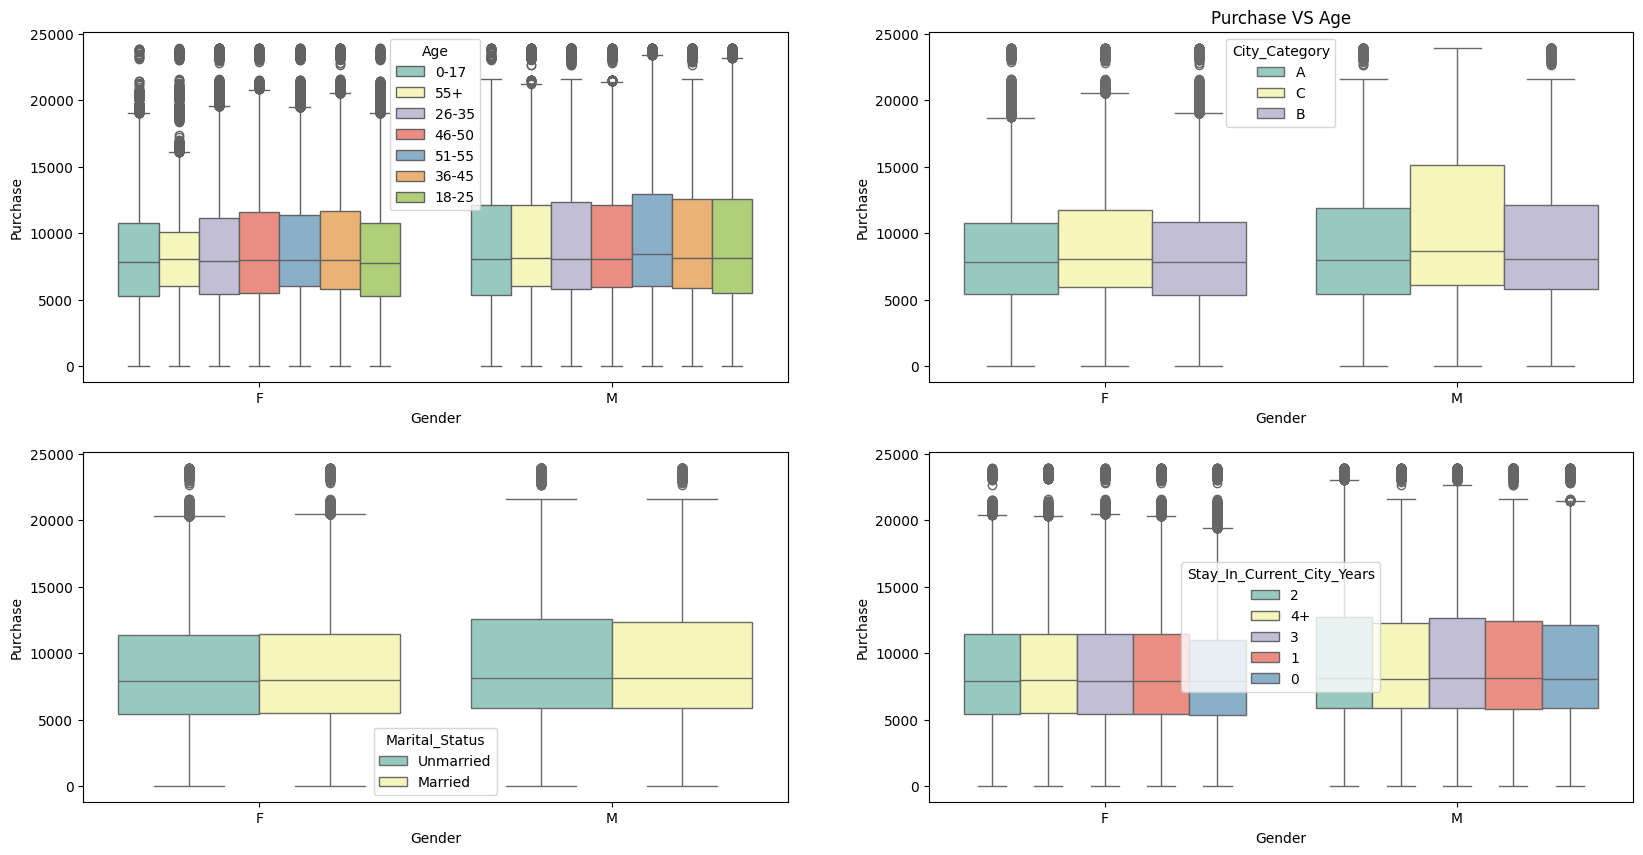

In [199]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(y='Purchase',x='Gender',hue='Age',data=df,palette='Set3')

plt.subplot(2,2,2)
sns.boxplot(y='Purchase',x='Gender',hue='City_Category',data=df,palette='Set3')
plt.title("Purchase VS Age")

plt.subplot(2,2,3)
sns.boxplot(y='Purchase',x='Gender',hue='Marital_Status',data=df,palette='Set3')


plt.subplot(2,2,4)
sns.boxplot(y='Purchase',x='Gender',hue='Stay_In_Current_City_Years',data=df,palette='Set3')

plt.show()

# **Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.**

In [200]:
avg_gender=df.groupby(['User_ID','Gender'])['Purchase'].sum()     #to sum all values by purchase
avg_gender=avg_gender.reset_index()
avg_gender

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [201]:
avg_gender['Gender'].value_counts()

,count
Gender,
M,4225
F,1666


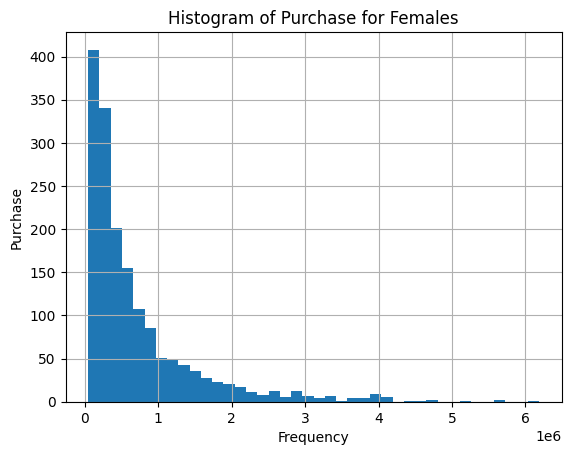

In [202]:
avg_gender[avg_gender['Gender']=='F']['Purchase'].hist(bins=40)
plt.ylabel('Purchase')
plt.xlabel('Frequency')
plt.title('Histogram of Purchase for Females')
plt.show()

The majority of the purchases are small amounts (clustered on the left side — near lower values).

Very few females made extremely high purchases (the long tail stretches towards the right).

Most female purchases are below 1 million (closer to 0–0.5 million).

Typical female customer makes smaller to moderate purchases.
Large purchases are rare events for females.

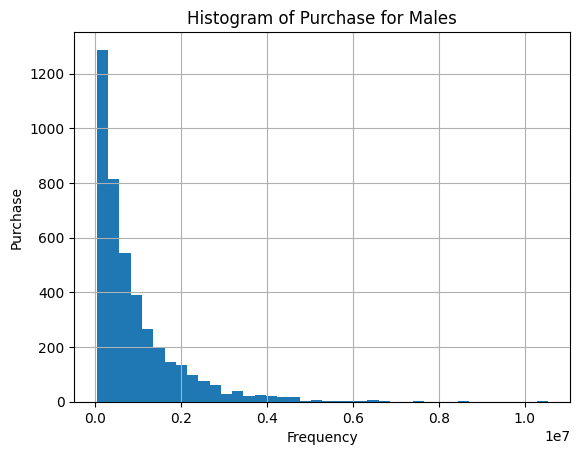

In [203]:
avg_gender[avg_gender['Gender']=='M']['Purchase'].hist(bins=40)
plt.ylabel('Purchase')
plt.xlabel('Frequency')
plt.title('Histogram of Purchase for Males')
plt.show()

More males overall (higher frequency at each purchase level — note the taller bars compared to females).

Higher extreme purchases — the x-axis for males goes up to 10 million, while for females it was around 6 million.

So, some males made very large purchases more than females.

Majority of males make smaller purchases, but there are more big spenders among males compared to females.

Male purchase distribution is more spread out towards higher amounts.

In [204]:
male_avg=avg_gender[avg_gender['Gender']=='M']['Purchase'].mean()
print(f"Average amount spend by male customers: {male_avg}")
female_avg=avg_gender[avg_gender['Gender']=='F']['Purchase'].mean()
print(f"Average amount spend by female customers: {female_avg}")

Average amount spend by male customers: 925344.4023668639
Average amount spend by female customers: 712024.3949579832


**Inference after computing the average female and male expenses.**

Male customers spend more than female customers

**Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.**

In [205]:
df_male=avg_gender[avg_gender['Gender']=='M']
df_female=avg_gender[avg_gender['Gender']=='F']

In [206]:
male_sample_size = 4000
female_sample_size = 2000
num_repitions = 1000
male_means = []
female_means = []

In [207]:
for _ in range(num_repitions):
    male_mean = df_male.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = df_female.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

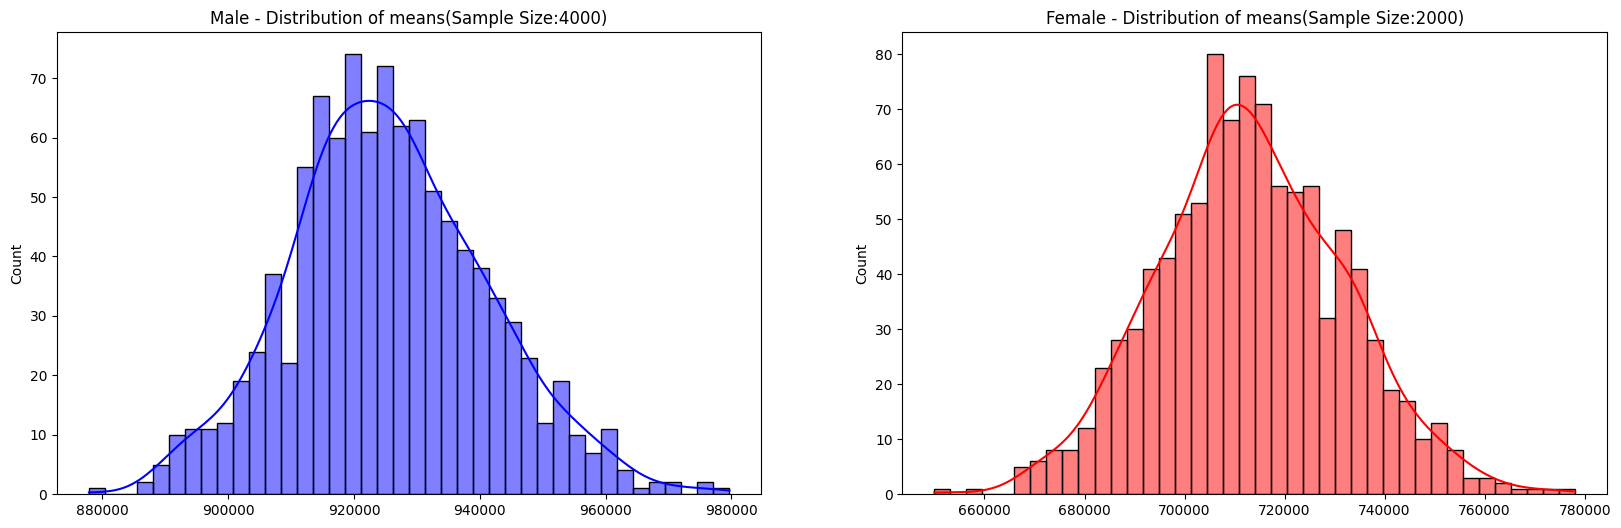

In [208]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.histplot(male_means, kde=True,bins=40, color='blue', label='Male')
plt.title("Male - Distribution of means(Sample Size:4000)")

plt.subplot(1,2,2)
sns.histplot(female_means, kde=True,bins=40,color='red', label='Female')
plt.title("Female - Distribution of means(Sample Size:2000)")
plt.show()

Males (left side):
➔ Centered around a higher mean (around 930,000).
➔ Sample size = 4000.

Females (right side):
➔ Centered around a lower mean (around 710,000).
➔ Sample size = 2000.

Thus, on average, male purchases are higher than female purchases.

Both curves are fairly tight (not very wide), meaning less variability in the sample means.

In [209]:
print(f"Population Male Mean - Mean sample mean amount spend for male customers: {np.mean(male_means)}")
print(f"Population Female Mean - Mean sample mean amount spend for female customers: {np.mean(female_means)}")
print(f"Male Sample mean: {df_male['Purchase'].mean()}\n Male STD: {df_male['Purchase'].std()}")
print(f"Female Sample mean: {df_female['Purchase'].mean()}\n Female STD: {df_female['Purchase'].std()}")

Population Male Mean - Mean sample mean amount spend for male customers: 925524.07496075
Population Female Mean - Mean sample mean amount spend for female customers: 713242.763086
Male Sample mean: 925344.4023668639
 Male STD: 985830.100795388
Female Sample mean: 712024.3949579832
 Female STD: 807370.7261464577


Average male purchase is higher than female purchase.

Sample means are normally distributed due to the Central Limit Theorem.

Larger sample size (males) ➔ less variability in sample means compared to females.

### Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.




*  The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

Male VS Female

In [210]:
male_sample_mean=df_male['Purchase'].mean()
male_sample_std=df_male['Purchase'].std()
female_sample_mean=df_female['Purchase'].mean()
female_sample_std=df_female['Purchase'].std()
sample_size=4000
confidence_level_95=0.95       #95% confidence level


In [211]:
z_critical=stats.norm.ppf((1+confidence_level_95)/2)
male_margin_of_error=z_critical*(male_sample_std/np.sqrt(sample_size))
male_low_lim=male_sample_mean-male_margin_of_error
male_high_lim=male_sample_mean+male_margin_of_error
print(f"Confidence Interval for 95% Male: ({male_low_lim:.2f}, {male_high_lim:.2f})")

Confidence Interval for 95% Male: (894793.77, 955895.03)


In [212]:
female_margin_of_error=z_critical*(female_sample_std/np.sqrt(sample_size))
female_low_lim=female_sample_mean-female_margin_of_error
female_high_lim=female_sample_mean+female_margin_of_error
print(f"Confidence Interval for 95% Female: ({female_low_lim:.2f}, {female_high_lim:.2f})")

Confidence Interval for 95% Female: (687004.18, 737044.61)


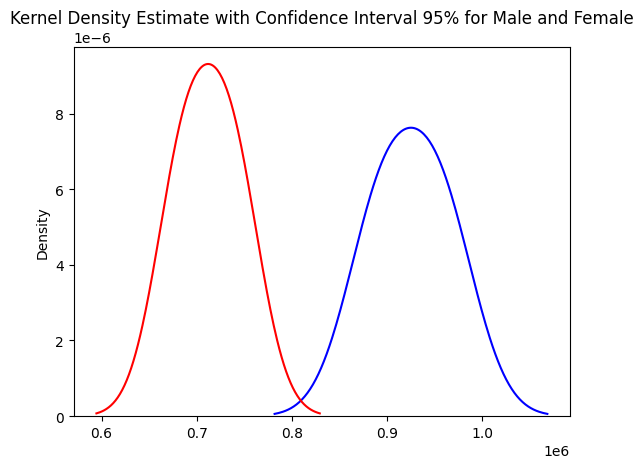

In [213]:
male_confidence_interval=(male_low_lim,male_high_lim)
female_confidence_interval=(female_low_lim,female_high_lim)

sns.kdeplot(male_confidence_interval, color='blue', label='Male')
sns.kdeplot(female_confidence_interval, color='red', label='Female')
plt.title("Kernel Density Estimate with Confidence Interval 95% for Male and Female")

plt.show()

this graph indicates that there's a real and likely statistically significant difference in whatever is being measured between females and males, with males tending to have higher values than females on average.

In [214]:
#Check for overlap
if male_low_lim <= female_high_lim and female_low_lim <= male_high_lim:
    print("The confidence intervals of average male and female spends are overlapping.")
else:
    print("The confidence intervals of average male and female spends are not overlapping.")

The confidence intervals of average male and female spends are not overlapping.


In [215]:
confidence_level_90=0.90       #90% confidence level

z_critical=stats.norm.ppf((1+confidence_level_90)/2)
male_margin_of_error=z_critical*(male_sample_std/np.sqrt(sample_size))
male_low_lim=male_sample_mean-male_margin_of_error
male_high_lim=male_sample_mean+male_margin_of_error
print(f"Confidence Interval for Male: ({male_low_lim:.2f}, {male_high_lim:.2f})")
female_margin_of_error=z_critical*(female_sample_std/np.sqrt(sample_size))
female_low_lim=female_sample_mean-female_margin_of_error
female_high_lim=female_sample_mean+female_margin_of_error
print(f"Confidence Interval for Female: ({female_low_lim:.2f}, {female_high_lim:.2f})")

Confidence Interval for Male: (899705.51, 950983.30)
Confidence Interval for Female: (691026.77, 733022.02)


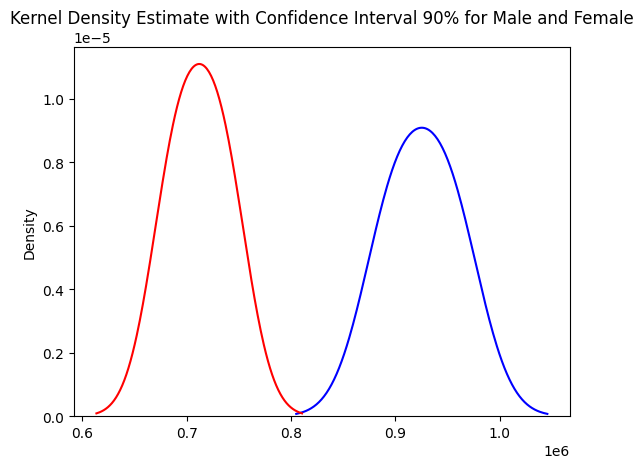

In [216]:
male_confidence_interval=(male_low_lim,male_high_lim)
female_confidence_interval=(female_low_lim,female_high_lim)

sns.kdeplot(male_confidence_interval, color='blue', label='Male')
sns.kdeplot(female_confidence_interval, color='red', label='Female')
plt.title("Kernel Density Estimate with Confidence Interval 90% for Male and Female")

plt.show()

males tend to have higher values for this characteristic than females on average, and this difference is likely statistically significant at a 90% confidence level due to the minimal overlap in their distributions.

In [217]:
#Check for overlap
if male_low_lim <= female_high_lim and female_low_lim <= male_high_lim:
    print("The confidence intervals of average male and female spends are overlapping.")
else:
    print("The confidence intervals of average male and female spends are not overlapping.")

The confidence intervals of average male and female spends are not overlapping.


In [218]:
confidence_level_99=0.99      #99% confidence level

z_critical=stats.norm.ppf((1+confidence_level_99)/2)
male_margin_of_error=z_critical*(male_sample_std/np.sqrt(sample_size))
male_low_lim=male_sample_mean-male_margin_of_error
male_high_lim=male_sample_mean+male_margin_of_error
print(f"Confidence Interval for Male: ({male_low_lim:.2f}, {male_high_lim:.2f})")
female_margin_of_error=z_critical*(female_sample_std/np.sqrt(sample_size))
female_low_lim=female_sample_mean-female_margin_of_error
female_high_lim=female_sample_mean+female_margin_of_error
print(f"Confidence Interval for Female: ({female_low_lim:.2f}, {female_high_lim:.2f})")

Confidence Interval for Male: (885194.07, 965494.74)
Confidence Interval for Female: (679142.25, 744906.54)


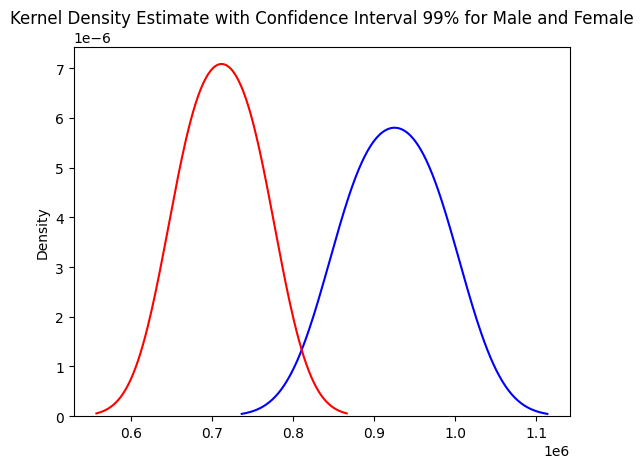

In [219]:
male_confidence_interval=(male_low_lim,male_high_lim)
female_confidence_interval=(female_low_lim,female_high_lim)

sns.kdeplot(male_confidence_interval, color='blue', label='Male')
sns.kdeplot(female_confidence_interval, color='red', label='Female')
plt.title("Kernel Density Estimate with Confidence Interval 99% for Male and Female")

plt.show()

The peaks of the curves continue to represent the approximate average values for each group. The female average is around 0.72 x 10⁶, and the male average is around 0.93 x 10⁶.

there is a statistically significant difference in the measured characteristic between males and females, with males tending to have higher values on average. The very minimal overlap in the distributions suggests that this difference is unlikely to be due to random chance, and we can be 99% confident in this conclusion.

In [220]:
#Check for overlap
if male_low_lim <= female_high_lim and female_low_lim <= male_high_lim:
    print("The confidence intervals of average male and female spends are overlapping.")
else:
    print("The confidence intervals of average male and female spends are not overlapping.")

The confidence intervals of average male and female spends are not overlapping.


In [221]:
df.Marital_Status.unique()

array(['Unmarried', 'Married'], dtype=object)

### Married VS Unmarried

In [222]:
sum_by_Marital_Status = df.groupby(['User_ID', 'Marital_Status'])['Purchase'].sum()         #to sum all values by purchase
sum_by_Marital_Status = sum_by_Marital_Status.reset_index()
sum_by_Marital_Status = sum_by_Marital_Status.sort_values(by='User_ID', ascending=False)
Married_cust_avg = sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']=="Married"]['Purchase'].mean()
print(f'Average Amount Spend by Married Customer: {Married_cust_avg}')
Unmarried_cust_avg = sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']=="Unmarried"]['Purchase'].mean()
print(f'Average Amount Spend by Unmarried Customer: {Unmarried_cust_avg}')

Average Amount Spend by Married Customer: 843526.7966855295
Average Amount Spend by Unmarried Customer: 880575.7819724905


In [223]:
df_married=sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']=="Married"]
df_unmarried=sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']=="Unmarried"]

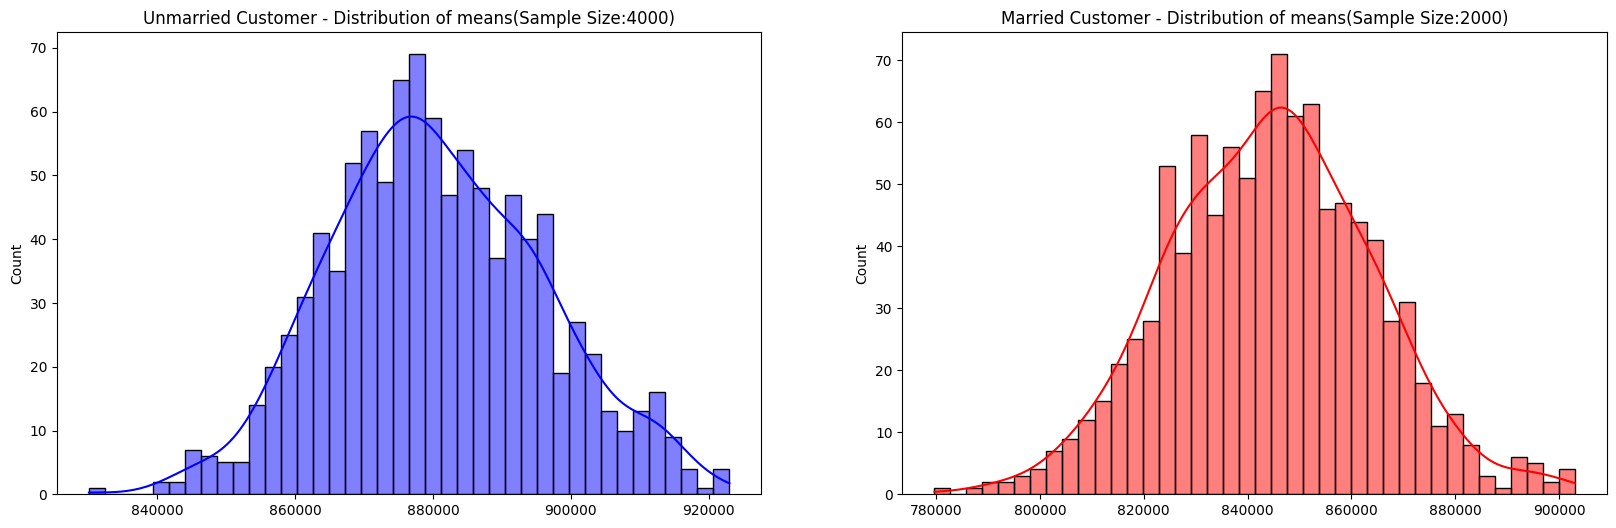

In [224]:
Unmarried_sample_size = 4000
Married_sample_size = 2000
num_repitions = 1000
Married_means = []
Unmarried_means = []

for _ in range(num_repitions):
    unmarried_mean = df_unmarried.sample(Unmarried_sample_size, replace=True)['Purchase'].mean()
    married_mean = df_married.sample(Married_sample_size, replace=True)['Purchase'].mean()

    Unmarried_means.append(unmarried_mean)
    Married_means.append(married_mean)


plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.histplot(Unmarried_means, kde=True,bins=40, color='blue', label='Unmarried')
plt.title("Unmarried Customer - Distribution of means(Sample Size:4000)")

plt.subplot(1,2,2)
sns.histplot(Married_means, kde=True,bins=40, color='red', label='Married')
plt.title("Married Customer - Distribution of means(Sample Size:2000)")
plt.show()

Unmarried customers, on average, tend to have a higher value for the characteristic being measured compared to married customers.

The estimates of the average for unmarried customers are likely more precise (less variable) due to the larger sample size used.

The difference in the average characteristic between the two groups appears substantial enough to warrant further statistical investigation into its significance.

In [225]:
print(f"Population Unmarried Customer Mean - Mean sample mean amount spend by Unmarried customers: {np.mean(Unmarried_means)}")
print(f"Population Unmarried Customer Mean - Mean sample mean amount spend by Married customers: {np.mean(Married_means)}")
print(f"Unmarried Customer Sample mean: {df_unmarried['Purchase'].mean()}\n Unmarried Customer STD: {df_unmarried['Purchase'].std()}")
print(f"Married Customer Sample mean: {df_married['Purchase'].mean()}\n Married Customer STD: {df_married['Purchase'].std()}")

Population Unmarried Customer Mean - Mean sample mean amount spend by Unmarried customers: 880564.68931025
Population Unmarried Customer Mean - Mean sample mean amount spend by Married customers: 844311.1799944999
Unmarried Customer Sample mean: 880575.7819724905
 Unmarried Customer STD: 949436.2495552393
Married Customer Sample mean: 843526.7966855295
 Married Customer STD: 935352.1158252311


Confidence Interval for 95% Unmarried: (851589.45, 909562.11)
Confidence Interval for 95% Married: (814540.47, 872513.13)


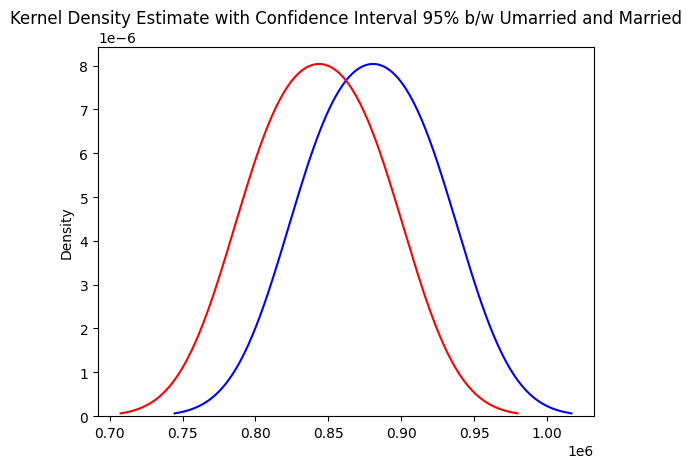

In [226]:
Unmarried_sample_mean=df_unmarried['Purchase'].mean()
Unmarried_sample_std=df_married['Purchase'].std()
Married_sample_mean=df_married['Purchase'].mean()
Married_sample_std=df_married['Purchase'].std()
sample_size=4000
confidence_level_95=0.95       #95% confidence level

z_critical=stats.norm.ppf((1+confidence_level_95)/2)
Unmarried_margin_of_error=z_critical*(Unmarried_sample_std/np.sqrt(sample_size))
Unmarried_low_lim=Unmarried_sample_mean - Unmarried_margin_of_error
Unmarried_high_lim=Unmarried_sample_mean + Unmarried_margin_of_error
print(f"Confidence Interval for 95% Unmarried: ({Unmarried_low_lim:.2f}, {Unmarried_high_lim:.2f})")


Married_margin_of_error=z_critical*(Married_sample_std/np.sqrt(sample_size))
Married_low_lim=Married_sample_mean - Married_margin_of_error
Married_high_lim=Married_sample_mean + Married_margin_of_error
print(f"Confidence Interval for 95% Married: ({Married_low_lim:.2f}, {Married_high_lim:.2f})")

Unmarried_confidence_interval=(Unmarried_low_lim,Unmarried_high_lim)
Married_confidence_interval=(Married_low_lim,Married_high_lim)

sns.kdeplot(Unmarried_confidence_interval, color='blue', label='Umarried')
sns.kdeplot(Married_confidence_interval, color='red', label='Married')
plt.title("Kernel Density Estimate with Confidence Interval 95% b/w Umarried and Married")

plt.show()

 The blue curve (unmarried) is centered slightly to the right of the red curve (married), suggesting a higher average value for the metric in the unmarried group.

 there's a slight observed difference in the means, it's not statistically significant at the 95% confidence level due to the substantial overlap in the estimated distributions of the means.

Confidence Interval for 90% Unmarried: (856249.69, 904901.88)
Confidence Interval for 90% Married: (819200.70, 867852.89)


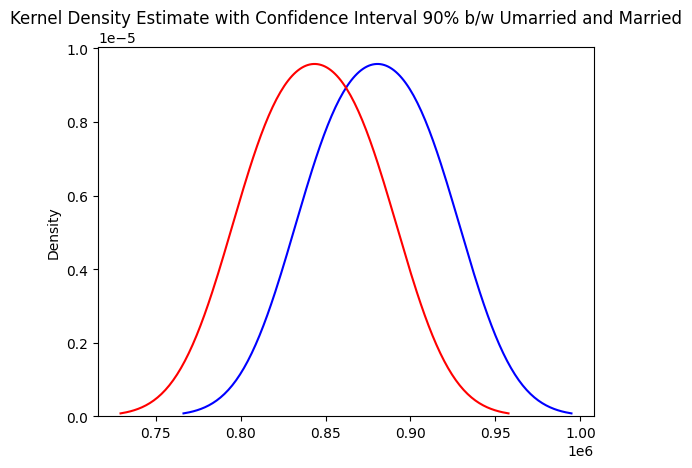

In [227]:
confidence_level_90=0.90       #90% confidence level

z_critical=stats.norm.ppf((1+confidence_level_90)/2)
Unmarried_margin_of_error=z_critical*(Unmarried_sample_std/np.sqrt(sample_size))
Unmarried_low_lim=Unmarried_sample_mean - Unmarried_margin_of_error
Unmarried_high_lim=Unmarried_sample_mean + Unmarried_margin_of_error
print(f"Confidence Interval for 90% Unmarried: ({Unmarried_low_lim:.2f}, {Unmarried_high_lim:.2f})")


Married_margin_of_error=z_critical*(Married_sample_std/np.sqrt(sample_size))
Married_low_lim=Married_sample_mean - Married_margin_of_error
Married_high_lim=Married_sample_mean + Married_margin_of_error
print(f"Confidence Interval for 90% Married: ({Married_low_lim:.2f}, {Married_high_lim:.2f})")

Unmarried_confidence_interval=(Unmarried_low_lim,Unmarried_high_lim)
Married_confidence_interval=(Married_low_lim,Married_high_lim)

sns.kdeplot(Unmarried_confidence_interval, color='blue', label='Umarried')
sns.kdeplot(Married_confidence_interval, color='red', label='Married')
plt.title("Kernel Density Estimate with Confidence Interval 90% b/w Umarried and Married")

plt.show()

Compared to the plot with the 95% confidence level, the overlap between the blue and red curves appears marginally less. This is because a 90% confidence interval is narrower than a 95% confidence interval (it captures a slightly smaller range of plausible values). Even with this slightly reduced overlap, there is still a substantial area where the two distributions intersect. This suggests that even at a 90% confidence level, the difference in the means might still not be statistically significant. We would still have a non-negligible chance of observing such a difference (or even a larger one) if there was no real difference between the population means.

Confidence Interval for 99% Unmarried: (842481.29, 918670.28)
Confidence Interval for 99% Married: (805432.30, 881621.29)


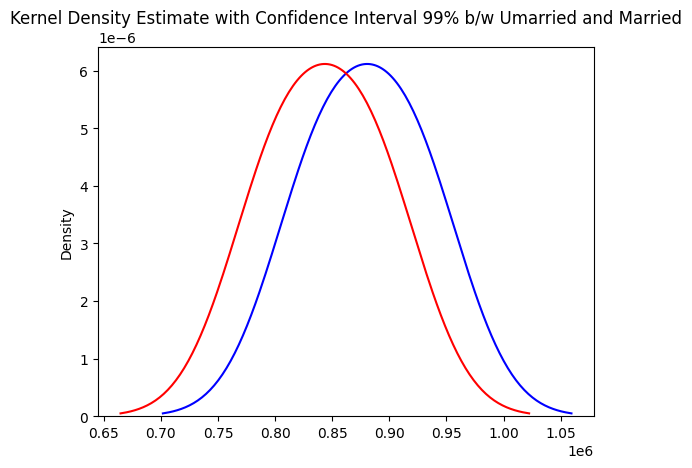

In [228]:
confidence_level_99=0.99       #99% confidence level

z_critical=stats.norm.ppf((1+confidence_level_99)/2)
Unmarried_margin_of_error=z_critical*(Unmarried_sample_std/np.sqrt(sample_size))
Unmarried_low_lim=Unmarried_sample_mean - Unmarried_margin_of_error
Unmarried_high_lim=Unmarried_sample_mean + Unmarried_margin_of_error
print(f"Confidence Interval for 99% Unmarried: ({Unmarried_low_lim:.2f}, {Unmarried_high_lim:.2f})")


Married_margin_of_error=z_critical*(Married_sample_std/np.sqrt(sample_size))
Married_low_lim=Married_sample_mean - Married_margin_of_error
Married_high_lim=Married_sample_mean + Married_margin_of_error
print(f"Confidence Interval for 99% Married: ({Married_low_lim:.2f}, {Married_high_lim:.2f})")

Unmarried_confidence_interval=(Unmarried_low_lim,Unmarried_high_lim)
Married_confidence_interval=(Married_low_lim,Married_high_lim)

sns.kdeplot(Unmarried_confidence_interval, color='blue', label='Umarried')
sns.kdeplot(Married_confidence_interval, color='red', label='Married')
plt.title("Kernel Density Estimate with Confidence Interval 99% b/w Umarried and Married")

plt.show()

this kernel density estimate plot provides the strongest visual evidence that there is likely no statistically significant difference in the average value of the metric between unmarried and married customers. The considerable overlap in their distributions at the 99% confidence level indicates that the observed difference in sample means is well within the range of what could be expected due to random variation, even if the true population means were the same.

In [229]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [230]:
age_df=df.groupby(['User_ID','Age'])['Purchase'].sum()      #to sum all values by purchase
age_df=age_df.reset_index()
age_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


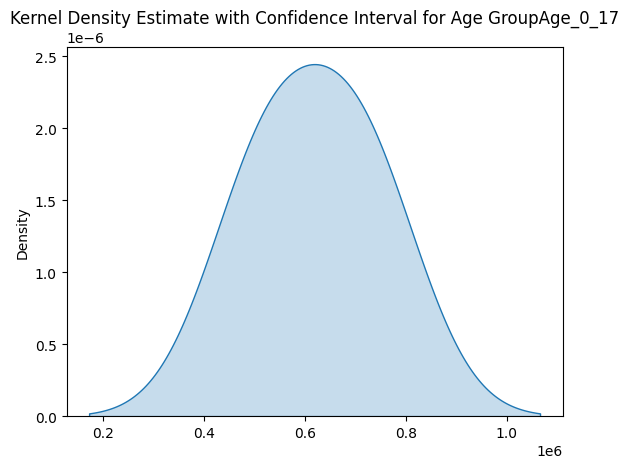

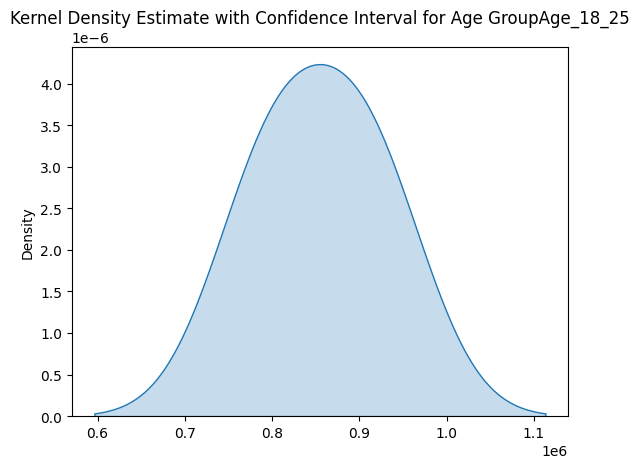

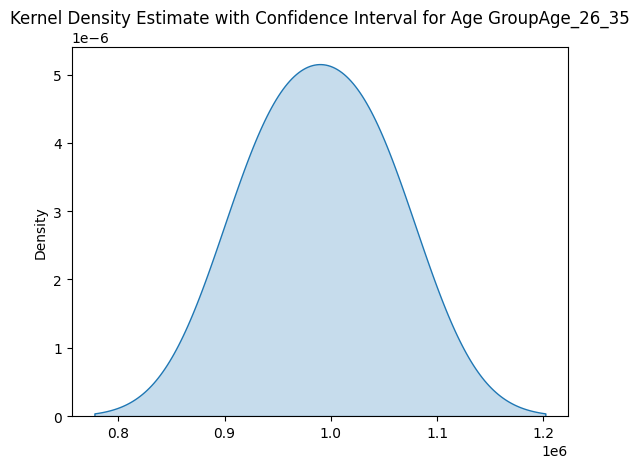

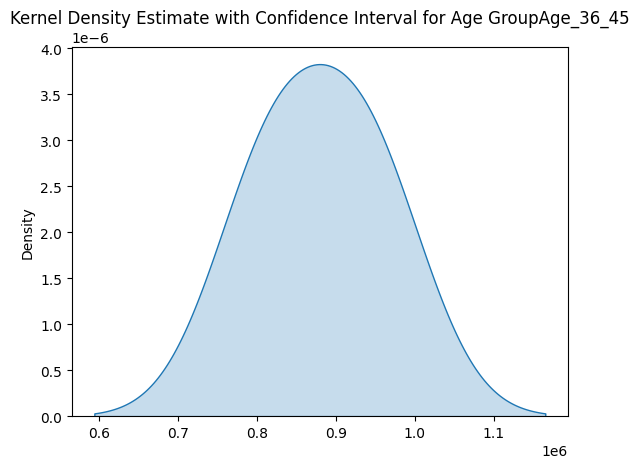

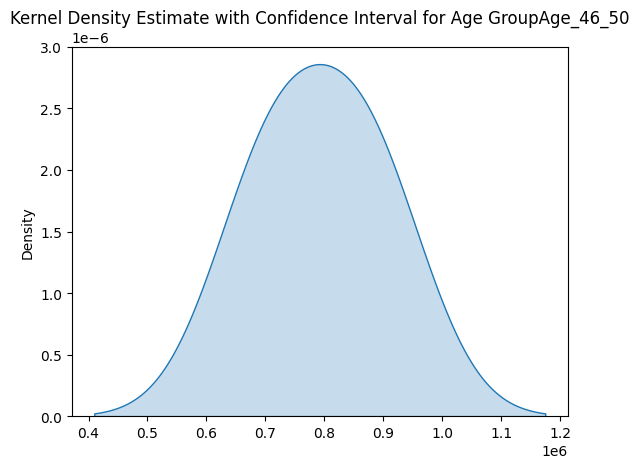

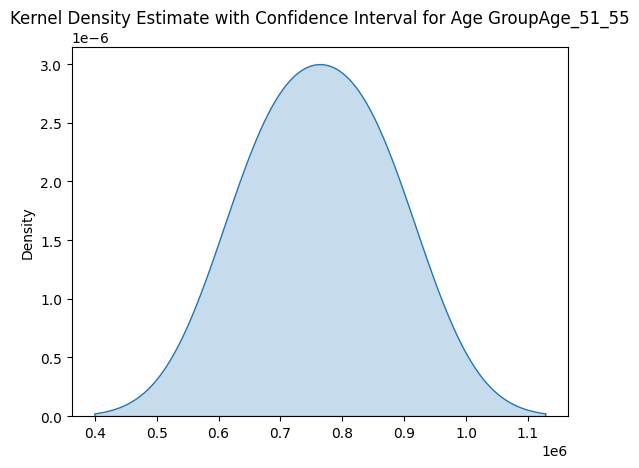

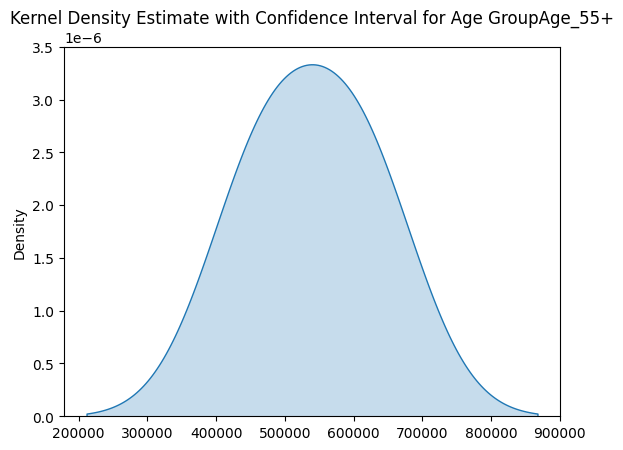

Age_0_17 average spent value, random mean value, std value and Confidence Interval:
Age_0_17 customer average spent amount: 618867.8119266055
Random Sample Mean : 619022.77738
Sample Mean Std: 13567.526386952817
Confidence Interval: (np.float64(523803.34072439576), np.float64(714242.2140356041))
Age_18_25 average spent value, random mean value, std value and Confidence Interval:
Age_18_25 customer average spent amount: 854863.119738073
Random Sample Mean : 854707.055331
Sample Mean Std: 7105.658696453088
Confidence Interval: (np.float64(799671.9059574603), np.float64(909742.2047045397))
Age_26_35 average spent value, random mean value, std value and Confidence Interval:
Age_26_35 customer average spent amount: 989659.3170969313
Random Sample Mean : 989686.0151085
Sample Mean Std: 3773.1324472063006
Confidence Interval: (np.float64(944474.5387785768), np.float64(1034897.4914384233))
Age_36_45 average spent value, random mean value, std value and Confidence Interval:
Age_36_45 customer a

In [237]:
def calculate_age_group_means_and_confidence_intervals(df):

  sum_by_age = df.groupby(['User_ID', 'Age'])['Purchase'].sum().reset_index()
  sum_by_age = sum_by_age.sort_values(by='User_ID', ascending=False)
# Create dict and filtering data age group wise
  age_groups = {
  'Age_0_17': sum_by_age[sum_by_age['Age'] == '0-17'],
  'Age_18_25': sum_by_age[sum_by_age['Age'] == '18-25'],
  'Age_26_35': sum_by_age[sum_by_age['Age'] == '26-35'],
  'Age_36_45': sum_by_age[sum_by_age['Age'] == '36-45'],
  'Age_46_50': sum_by_age[sum_by_age['Age'] == '46-50'],
  'Age_51_55': sum_by_age[sum_by_age['Age'] == '51-55'],
  'Age_55+': sum_by_age[sum_by_age['Age'] == '55+']
  }
# Define sample sizes and number of repetitions
  sample_sizes = {
  'Age_0_17': 200,
  'Age_18_25': 1000,
  'Age_26_35': 2000,
  'Age_36_45': 1000,
  'Age_46_50': 500,
  'Age_51_55': 400,
  'Age_55+': 300
  }
  num_repitions = 1000
# Create a dictionary to store results
  results = {}
# Perform random sampling and calculate means for each age group
  for age_group, age_df in age_groups.items():
    sample_size = sample_sizes.get(age_group, 0)
    sample_means = []
    for _ in range(num_repitions):
      random_sample = age_df.sample(n=sample_size)
      sample_mean = random_sample['Purchase'].mean()
      sample_means.append(sample_mean)
# Calculate the population mean, sample mean, and standard deviation
    population_mean = age_df['Purchase'].mean()
    sample_mean_mean = sum(sample_means) / len(sample_means)
    sample_mean_std = pd.Series(sample_means).std()
# Calculate the confidence interval using the z-distribution
    confidence_level = 0.95 # 95% confidence interval
    z_critical = stats.norm.ppf((1 + confidence_level) / 2) # Z-score for the desired confidence level

    margin_of_error = z_critical * (age_df['Purchase'].std() / np.sqrt(sample_size))
    lower_bound = sample_mean_mean - margin_of_error
    upper_bound = sample_mean_mean + margin_of_error
    results[age_group] = {
    'Population Mean': population_mean,
    'Sample Mean Mean': sample_mean_mean,
    'Sample Mean Std': sample_mean_std,
    'Confidence Interval': (lower_bound, upper_bound)
    }
    CI=(lower_bound, upper_bound)
    sns.kdeplot(CI,label=age_group,fill=True,)
    plt.title(f"Kernel Density Estimate with Confidence Interval for Age Group{age_group}")
    plt.show()
  return results
results = calculate_age_group_means_and_confidence_intervals(df)
for age_group, metrics in results.items():
  print(f'{age_group} average spent value, random mean value, std value and Confidence Interval:')
  print(f'{age_group} customer average spent amount: {metrics["Population Mean"]}')
  print(f'Random Sample Mean : {metrics["Sample Mean Mean"]}')
  print(f'Sample Mean Std: {metrics["Sample Mean Std"]}')
  print(f'Confidence Interval: {metrics["Confidence Interval"]}')

Highest Spenders: The age group 26-35 has the highest average spending amount (around ₹989,659).

Second Highest: The 18-25 and 36-45 age groups also show relatively high average spending (around ₹854,863 and ₹879,666, respectively).
Lower Spenders: The average spending tends to decrease for older age groups (46-50, 51-55, and 55+).

Lowest Spenders: The youngest age group (0-17) and the oldest (55+) have the lowest average spending amounts (around ₹618,868 and ₹539,697, respectively).

The clear separation between the KDE plots (and thus their underlying confidence intervals) for the highest spending group (26-35) and the lowest spending groups (0-17 and 55+) strongly suggests statistically significant differences in average spending between these segments. Similarly, the mid-range spending groups (18-25 and 36-45) appear separated from the lowest spending groups.

The overlap in the KDE plots (and implied overlap in confidence intervals) for groups with similar average spending (e.g., potentially between 18-25 and 36-45, or among some of the lower-spending groups) suggests that the differences in their average spending might not be statistically significant.

The KDE plots visually reinforce the idea that age is a strong predictor of average customer spending. The 26-35 age group stands out as the highest spending segment, and our estimate of their average spending is the most precise. The youngest and oldest customer groups tend to spend the least, and our estimates for these groups have the most uncertainty. The visual separation and overlap of the confidence intervals across different age groups provide a qualitative assessment of where statistically significant differences in average spending are likely to exist.

# **INSIGHTS**

 # Demographics and Purchase Behavior:

### Gender:  A significantly higher proportion of male customers (75%) make purchases compared to female customers (25%).  The average purchase amount is higher for male customers.
### Age: The 26-35 age group is the most frequent purchaser, while the 0-17 age group shows the lowest purchasing frequency.  Later analysis reveals that the 26-35 age group also has the highest average spending.
### City Category: Most customers reside in City Category B, whereas the fewest are from City Category A.
### Marital Status:  Married customers constitute the majority.  However, the analysis of average spending between married and unmarried customers shows no significant difference.
## Stay_In_Current_City_Years: Customers who have stayed in their current city for 4+ years represent the largest group.

# Product and Occupation Insights:

### Product_Category: Product Category 5 is the most frequently purchased, followed by Product Category 1.  Product category 19 is the least preferred.
### Occupation: Occupation 4 is the most common among customers, followed by Occupation 0 and Occupation 1.

# Statistical Analysis (Confidence Intervals):

### Gender Differences:  A statistically significant difference in average spending exists between male and female customers. Males spend considerably more on average.  The confidence intervals are calculated and visualized using KDE plots at different confidence levels (90%, 95%, 99%).
### Marital Status Differences: There is no statistically significant difference observed in the average spending between married and unmarried customers at any of the confidence levels.
### Age Group Differences:  The 26-35 age group demonstrates the highest average spending. Significant differences in average spending are observed between the highest spending age group and the lowest spending groups (0-17 and 55+).  Other mid-range age groups also demonstrate spending habits statistically different than the lowest spending age groups.  Less certainty exists on the spending differences between the mid-range spending groups.

# Outliers:

### Outliers were detected in the 'Purchase' variable.  Boxplots and histograms were used to identify them.

# **RECOMMENDATIONS**

**1. Targeted Marketing Campaigns:**

* **Focus on Male Customers:** Given that male customers constitute a larger proportion of purchases and spend significantly more on average, prioritize marketing efforts towards this demographic. Tailor promotions and product offerings to their preferences, potentially leveraging data on their preferred product categories and occupations.

* **Age-Based Segmentation:** Design targeted campaigns for different age groups, particularly focusing on the high-spending 26-35 age group.  Develop marketing messages and product bundles that resonate with this demographic's preferences and needs. Consider exploring what products are resonating with the 18-25 and 36-45 age groups to potentially expand the high spending demographic. Conversely, analyze the purchasing patterns of the lowest spending groups (0-17 and 55+) to identify opportunities for growth in these segments. Explore how to attract these groups with specialized offers and product assortments.

* **Location-Based Promotions:**  Since most customers come from City Category B, concentrate marketing activities in this area.  Explore promotions, discounts and products tailored to the preferences of customers in these areas.

**2. Product Strategy:**

* **Product Category Optimization:**  Stock up on products from Category 5 and 1 (most popular) while maintaining adequate inventory. Investigate the reasons behind the low popularity of Category 19. Consider whether to discontinue or re-position these products within the store layout or online platform. This strategy should account for seasonal trends and demand.

* **Product Bundling:** Leverage the insights on product categories most frequently purchased to create attractive product bundles and cross-selling opportunities.

**3. Customer Relationship Management (CRM):**

* **Customer Segmentation:** Build more sophisticated customer segments based on a combination of demographic data (gender, age, marital status, city category, years in current city) and purchase behavior (spending patterns, preferred product categories). This granular segmentation will enable personalized communication and offers.

* **Loyalty Programs:** Design loyalty programs that reward high-spending customers and incentivize repeat purchases. For example consider increasing reward values for product category 5 and 1, while incentivizing other low-performing categories.

**4. Inventory Management:**

* **Optimize Stock Levels:** Based on purchase frequencies and average spend per category and demographic, fine-tune inventory levels to minimize overstocking of less popular items and ensure adequate supplies of high-demand products.

**5. Further Analysis and A/B Testing:**

* **Explore Deeper Customer Profiling:** Investigate the root cause of higher spending by male customers. Collect qualitative data through surveys or focus groups to gain better insight into customer preferences.

* **A/B Test Promotions:** Continuously test different marketing messages and promotional offers to determine what resonates best with different customer segments. A/B test new product displays or online promotions to understand what affects purchase conversion rates and spending behaviors.

* **Impact of Marital Status on Purchasing Behavior:** Conduct deeper investigations into why marital status showed no clear difference in spending despite being a large customer segment. This might indicate the need for more specific segmentation within this category, such as household size, or family income.